# INFOTECH ACADEMY MACHINE LEARNING-1 HOMEWORK

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

### Load Dataset

In [2]:
df_origin = pd.read_csv('titanic_dataset.csv')
df = df_origin.copy()
df.head(20)


,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


## Step 1: Define the Problem

Clearly define the problem you want to solve using the Titanic dataset. For example, you could predict whether a passenger survived or not based on various features.

Predict which passengers are transported to an alternate dimension

## Step 2: Gather and Explore the Data

Obtain the Titanic dataset from a reliable source, such as Kaggle.
Explore the dataset to understand its structure and variables.
Identify the features that are available and their potential relevance to the problem.

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. 
Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12970.0,3617.887741,2408.607419,0.0,1621.0,3242.0,5449.75,8692.0
Age,12700.0,28.771969,14.387261,0.0,19.0,27.0,38.00,79.0
RoomService,12707.0,222.897852,647.596664,0.0,0.0,0.0,49.00,14327.0
FoodCourt,12681.0,451.961675,1584.370747,0.0,0.0,0.0,77.00,29813.0
ShoppingMall,12664.0,174.906033,590.558690,0.0,0.0,0.0,29.00,23492.0
Spa,12686.0,308.476904,1130.279641,0.0,0.0,0.0,57.00,22408.0
VRDeck,12702.0,306.789482,1180.097223,0.0,0.0,0.0,42.00,24133.0


In [4]:
df.nunique()

Unnamed: 0       8693
PassengerId     12970
HomePlanet          3
CryoSleep           2
Cabin            9825
Destination         3
Age                80
VIP                 2
RoomService      1578
FoodCourt        1953
ShoppingMall     1367
Spa              1679
VRDeck           1642
Name            12629
Transported         2
dtype: int64

In [5]:
df.isnull().sum()

Unnamed: 0        0
PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
Transported       0
dtype: int64

<Axes: xlabel='Transported'>

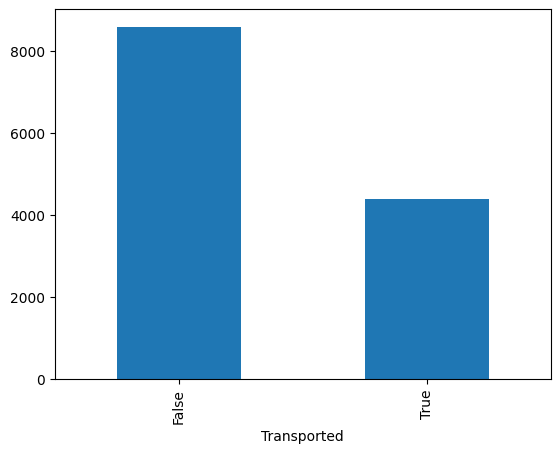

In [6]:
plot_df =df.Transported.value_counts()
plot_df.plot(kind="bar")

<Axes: xlabel='VRDeck', ylabel='Count'>

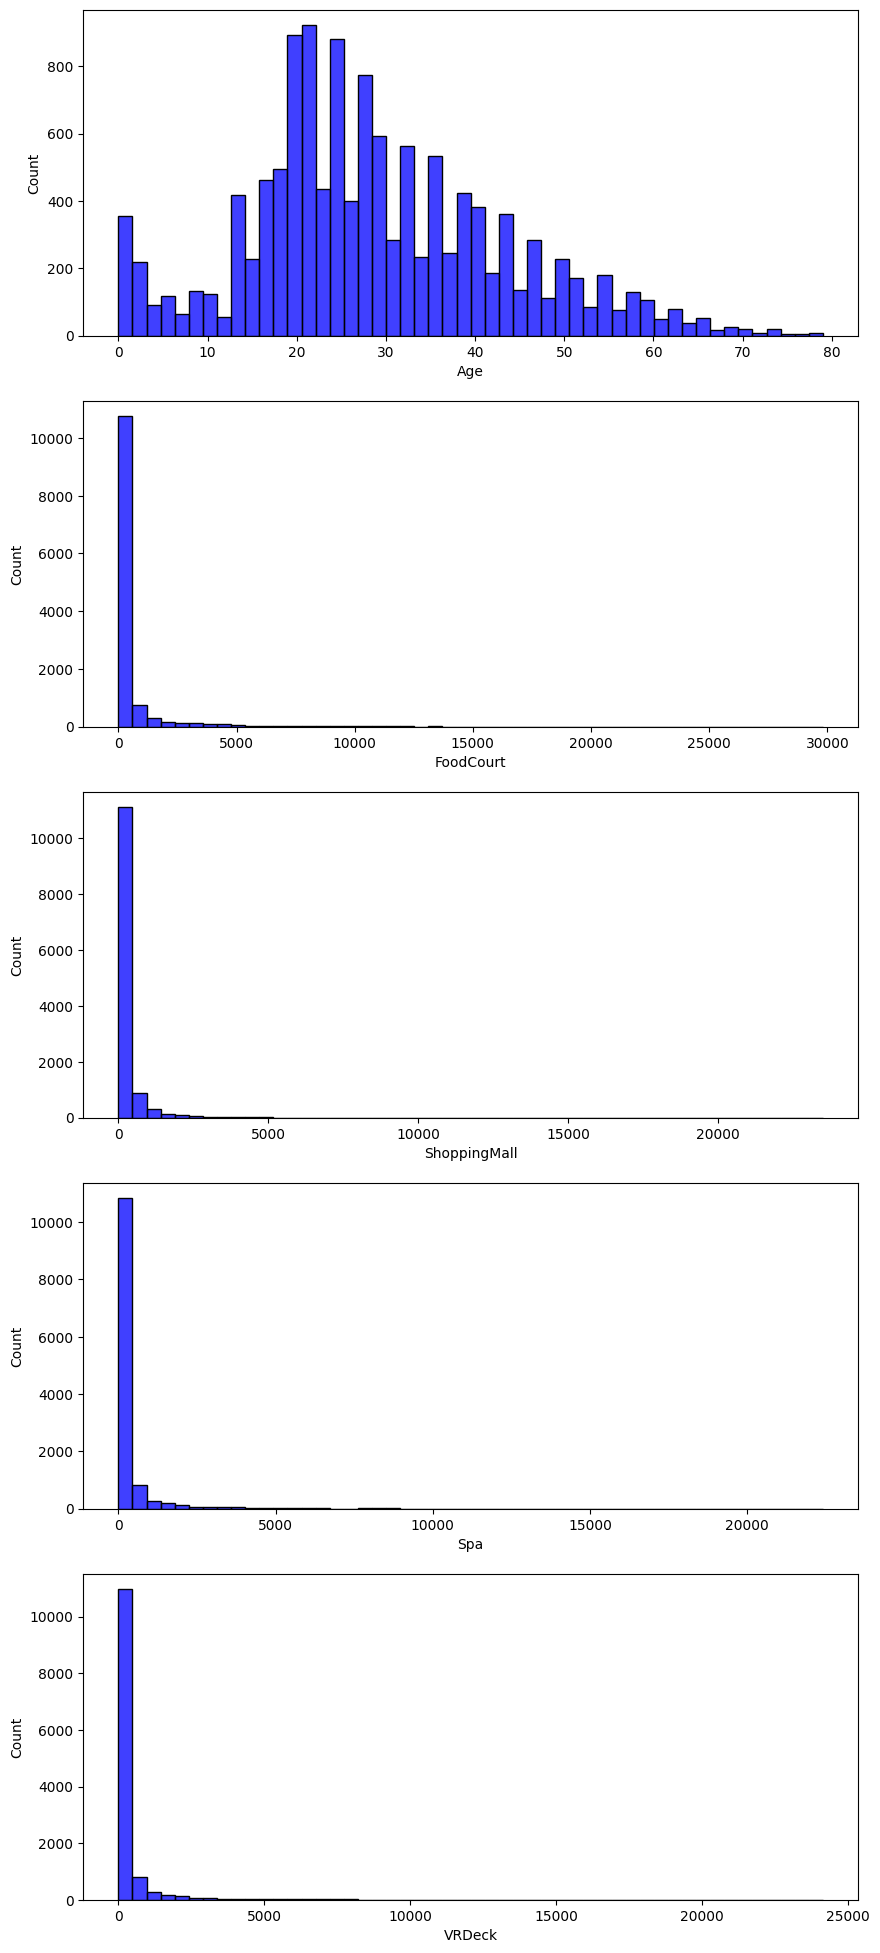

In [7]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(df['Age'], color='b', bins=50, ax=ax[0])
sns.histplot(df['FoodCourt'], color='b', bins=50, ax=ax[1])
sns.histplot(df['ShoppingMall'], color='b', bins=50, ax=ax[2])
sns.histplot(df['Spa'], color='b', bins=50, ax=ax[3])
sns.histplot(df['VRDeck'], color='b', bins=50, ax=ax[4])

## Step 3: Preprocess the Data

* Handle missing values by imputing or removing them appropriately.
* Detect and handle outliers using techniques such as:
    - **Visualization** : Plot box plots or histograms to identify potential outliers.
    - **Statistical methods**: Calculate z-scores or interquartile ranges to identify and handle outliers.
* Transform categorical variables into numerical representations (e.g., one-hot encoding).
* Normalize or scale numerical features as needed.

In [8]:
missing_percantage = df.isnull().mean()*100
columns_with_missing_values = missing_percantage[missing_percantage > 0]
for column, percentage in columns_with_missing_values.items():
    print(f"{column} : {percentage : .2f}%")

HomePlanet :  2.22%
CryoSleep :  2.39%
Cabin :  2.31%
Destination :  2.11%
Age :  2.08%
VIP :  2.28%
RoomService :  2.03%
FoodCourt :  2.23%
ShoppingMall :  2.36%
Spa :  2.19%
VRDeck :  2.07%
Name :  2.27%


In [9]:
# Missing values are at most 3 percent of the data. Tts better to fill those with mode
for column, percentage in columns_with_missing_values.items():
    df[column].fillna(df[column].mode()[0], inplace=True)

In [10]:
def find_percantage_dead(df,column,case):
    if case is None:
        a =df.loc[df[column]>df[column].mean(),([column,"Transported"])].value_counts("Transported")
        per = a/len(df.loc[df[column]>df[column].mean(),([column,"Transported"])])*100
        print(per)
    elif case is True or False:
        a =df.loc[df[column] == case,([column,"Transported"])].value_counts("Transported")
        per = a/len(df.loc[df[column] == case,([column,"Transported"])])*100
        print(per)
    else :
        a =df.loc[df[column]> case ,([column,"Transported"])].value_counts("Transported")
        per = a/len(df.loc[df[column]>case,([column,"Transported"])])*100
        print(per)

In [11]:
def clear_outliers(data,column,quant=float):
    Q1 = data[column].quantile(0.00)
    Q3 = data[column].quantile(quant)
    IQR = Q3 - Q1
    threshold = 1.5
    outliers = data[(data[column] < Q1 - threshold * IQR) | (data[column] > Q3 + threshold * IQR)]
    
    for index, value in data[column].items():
        if value > outliers[column].min():
            # Replace values greater than outliers[column].min() with random values up to outliers[column].min()
            replacement = np.random.randint(outliers[column].min())
            data.at[index, column] = replacement

In [12]:
find_percantage_dead(df,"VIP",True)

Transported
False    72.161172
True     27.838828
Name: count, dtype: float64


In [13]:
find_percantage_dead(df,"FoodCourt",20000)

Transported
True     55.555556
False    44.444444
Name: count, dtype: float64


In [14]:
df['Transported'].value_counts()/len(df['Transported'])*100

Transported
False    66.245181
True     33.754819
Name: count, dtype: float64

In [15]:
find_percantage_dead(df,"RoomService",None) # There is something wrong with the RoomService

Transported
False    87.861272
True     12.138728
Name: count, dtype: float64


In [16]:
find_percantage_dead(df,"Spa",200) # There is something wrong with the Spa

Transported
False    87.702922
True     12.297078
Name: count, dtype: float64


In [17]:
df.isnull().sum()

Unnamed: 0      0
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [18]:
# sns.pairplot(df[numeric_columns],kind="reg")

In [19]:
df['group_size'] = None # Being in a large or small group may have affect on the survival.

In [20]:
# next to code section calculates groupsize
for index, row in df.iterrows():
    group_size = 0
    if index == 0:
        group_size = 1
    elif index in range(1,12962):
        for i in range(8):
            if int(df.loc[index, 'PassengerId'].split('_')[0]) == int(df.loc[index+i, 'PassengerId'].split('_')[0]):
                group_size += 1
            else :
                break
    else :
        group_size += 1
    df.loc[index, 'group_size'] = group_size


In [21]:
df['group_size'] =df['group_size'].astype(int)

In [22]:

while i in range(len(df)):
    if df.loc[i, 'group_size'] != 1:
        for j in range(df.loc[i, 'group_size']-1):
            df.loc[i+j+1, 'group_size'] = df.loc[i, 'group_size']
        i = i + df.loc[i, 'group_size']
    else:
        i = i +1
    

In [23]:
df.loc[df["group_size"] <2,(["group_size","Transported"])].value_counts("Transported")

Transported
False    4973
True     2174
Name: count, dtype: int64

In [24]:
columns = df.columns.tolist()
columns.insert(2, columns.pop())
df = df[columns]

In [25]:
df["Cabin"]

0           B/0/P
1           F/0/S
2           A/0/S
3           A/0/S
4           F/1/S
           ...   
12965    G/1496/S
12966     G/160/P
12967     D/296/P
12968     D/297/P
12969    G/1498/S
Name: Cabin, Length: 12970, dtype: object

In [26]:
df['Side'] = df['Cabin'].str[-1]
df['Side'] = df['Side'].replace('S',1)
df['Side'] = df['Side'].replace('P',0)

In [27]:
df

,Unnamed: 0,PassengerId,group_size,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Side
0,0,0001_01,1,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
1,1,0002_01,1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1
2,2,0003_01,2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,3,0003_02,2,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,4,0004_01,1,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,4272,9266_02,1,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,False,1
12966,4273,9269_01,1,Earth,False,G/160/P,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,False,0
12967,4274,9271_01,1,Mars,True,D/296/P,55 Cancri e,18.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,False,0
12968,4275,9273_01,1,Europa,False,D/297/P,TRAPPIST-1e,18.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,False,0


In [28]:
df['Cabin']
df['first_letter_cabin'] = df['Cabin'].str[0]

In [29]:
df['first_letter_cabin'].value_counts()

first_letter_cabin
F    4239
G    4080
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: count, dtype: int64

In [30]:
df['Number_cabin'] = df['Cabin'].str.extract(r'(\d+)')

In [31]:
df['Number_cabin']=df['Number_cabin'].astype(int)

In [32]:
find_percantage_dead(df,"Number_cabin",None)

Transported
False    66.256962
True     33.743038
Name: count, dtype: float64


In [33]:
find_percantage_dead(df,"Side",None)

Transported
False    62.701771
True     37.298229
Name: count, dtype: float64


In [34]:
def show_outliers(df,column):
    
    # plt.ylim(20000, max(df[column]) - 1000)
    plt.figure(figsize=(8, 6))
    # plt.xscale('log')
    plt.boxplot(x=df[column],patch_artist=True,vert=False ,boxprops=dict(facecolor='lightblue', linewidth=2, edgecolor='black'))
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title('Outliers Plot of '+ column)
    plt.show()

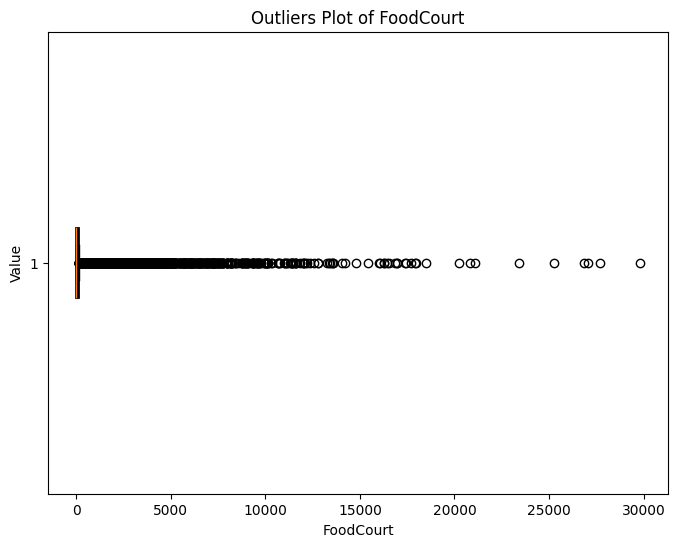

In [35]:
show_outliers(df,"FoodCourt")

In [36]:
clear_outliers(df,"FoodCourt",0.97)

In [37]:
clear_outliers(df,'RoomService',0.97)

In [38]:
find_percantage_dead(df,"RoomService",-1)

Transported
False    66.245181
True     33.754819
Name: count, dtype: float64


In [39]:
a = df.loc[df["RoomService"] ==0 ,(['RoomService',"Transported"])].value_counts("Transported")
per = a/len(df.loc[df['RoomService'] ==0,(['RoomService',"Transported"])])*100
print(a)
per

Transported
False    4951
True     3615
Name: count, dtype: int64


Transported
False    57.798272
True     42.201728
Name: count, dtype: float64

In [40]:
df.isnull().sum()

Unnamed: 0            0
PassengerId           0
group_size            0
HomePlanet            0
CryoSleep             0
Cabin                 0
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Name                  0
Transported           0
Side                  0
first_letter_cabin    0
Number_cabin          0
dtype: int64

In [41]:
df.describe()

,Unnamed: 0,group_size,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Side,Number_cabin
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,3617.887741,2.022822,28.547726,204.210794,390.642791,170.779491,301.722282,300.450270,0.491981,593.375482
std,2408.607419,1.577153,14.319544,532.298892,1187.763029,584.153630,1118.746785,1168.655639,0.499955,511.297918
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1621.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160.000000
50%,3242.000000,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,409.000000
75%,5449.750000,2.000000,37.000000,42.750000,62.750000,23.000000,50.000000,36.000000,1.000000,992.000000
max,8692.000000,8.000000,79.000000,4397.000000,10049.000000,23492.000000,22408.000000,24133.000000,1.000000,1894.000000


In [42]:
df.nunique()

Unnamed: 0             8693
PassengerId           12970
group_size                8
HomePlanet                3
CryoSleep                 2
Cabin                  9825
Destination               3
Age                      80
VIP                       2
RoomService            1562
FoodCourt              1946
ShoppingMall           1367
Spa                    1679
VRDeck                 1642
Name                  12629
Transported               2
Side                      2
first_letter_cabin        8
Number_cabin           1894
dtype: int64

HomePlanet          3
CryoSleep           2
Destination         3
VIP                 2
Transported         2
These are most probably categorised columns
Cabin            9825
Maybe only one part of the cabin section is defected.


In [43]:
df['HomePlanet'].value_counts()

HomePlanet
Earth     7153
Europa    3133
Mars      2684
Name: count, dtype: int64

In [44]:

label_encoder = LabelEncoder()
df['first_letter_cabin'] = label_encoder.fit_transform(df['first_letter_cabin'])
df['HomePlanet'] = label_encoder.fit_transform(df['HomePlanet'])
df['Destination'] = label_encoder.fit_transform(df['Destination'])

In [45]:
# columns_to_encode = ['HomePlanet', 'Destination','first_letter_cabin']

# df_encoded = pd.get_dummies(df[columns_to_encode], prefix=columns_to_encode)
# df = pd.concat([df, df_encoded], axis=1)

In [46]:
df.head()

,Unnamed: 0,PassengerId,group_size,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Side,first_letter_cabin,Number_cabin
0,0,0001_01,1,1,False,B/0/P,2,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,1,0002_01,1,0,False,F/0/S,2,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,5,0
2,2,0003_01,2,1,False,A/0/S,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,0
3,3,0003_02,2,1,False,A/0/S,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,0
4,4,0004_01,1,0,False,F/1/S,2,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,5,1


In [47]:
True_False_columns = ['VIP','CryoSleep','Transported']
df[True_False_columns] = df[True_False_columns].astype(int)

In [48]:
df.head()

,Unnamed: 0,PassengerId,group_size,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Side,first_letter_cabin,Number_cabin
0,0,0001_01,1,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,1,0
1,1,0002_01,1,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,1,5,0
2,2,0003_01,2,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1,0,0
3,3,0003_02,2,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,1,0,0
4,4,0004_01,1,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1,5,1


In [49]:

numeric_columns = ["Age","FoodCourt","ShoppingMall","RoomService","Spa","VRDeck"]
categorical_columns = ["group_size",'HomePlanet',"CryoSleep","Destination","VIP","Transported","Side","first_letter_cabin","Number_cabin"]
columns_to_drop = ['Unnamed: 0', 'PassengerId','Cabin','Name']
df = df.drop(columns_to_drop, axis=1)

In [50]:
# Calculate Cramér's V
def cramers_v(column1):
    table = pd.crosstab(df[column1], df['Transported'])
    chi2 = stats.chi2_contingency(table)[0]
    n = table.sum().sum()
    phi2 = chi2 / n
    r, k = table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


In [51]:
for i in categorical_columns:
    cramer_v = cramers_v(i)
    print(f"{i} column Cramér's V:", cramer_v)

group_size column Cramér's V: 0.08992592029804486
HomePlanet column Cramér's V: 0.1390935188733458
CryoSleep column Cramér's V: 0.3192545148983753
Destination column Cramér's V: 0.08393645137007932
VIP column Cramér's V: 0.01545732952519168
Transported column Cramér's V: 0.9998275856353401
Side column Cramér's V: 0.07305522969031011
first_letter_cabin column Cramér's V: 0.15759731033345292
Number_cabin column Cramér's V: 0.18790449889811928


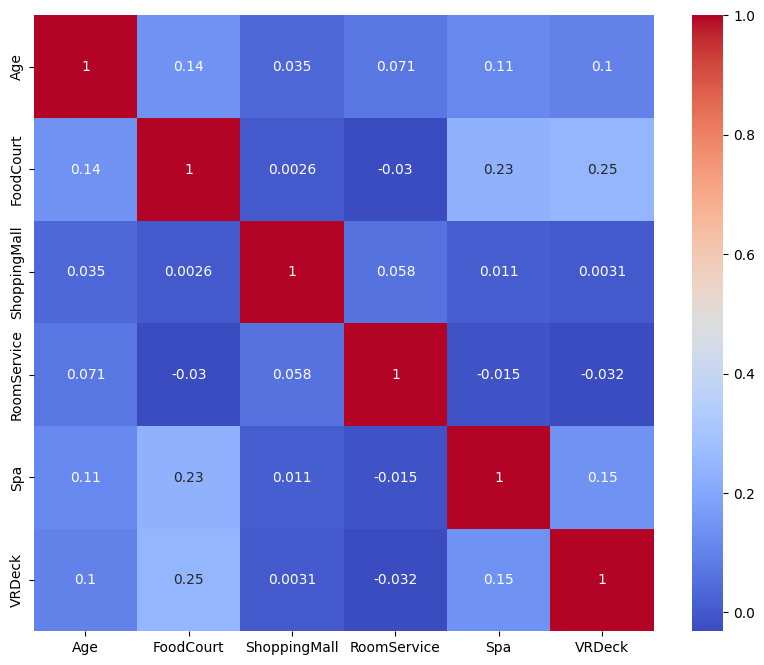

In [52]:
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Step 4: Check for Normality

Perform a normality check on the numerical features to assess if they follow a Gaussian distribution.
Use techniques like histograms, Q-Q plots, or statistical tests (e.g., Shapiro-Wilk test) to check for normality.

If the data is not normally distributed, consider applying appropriate transformations.

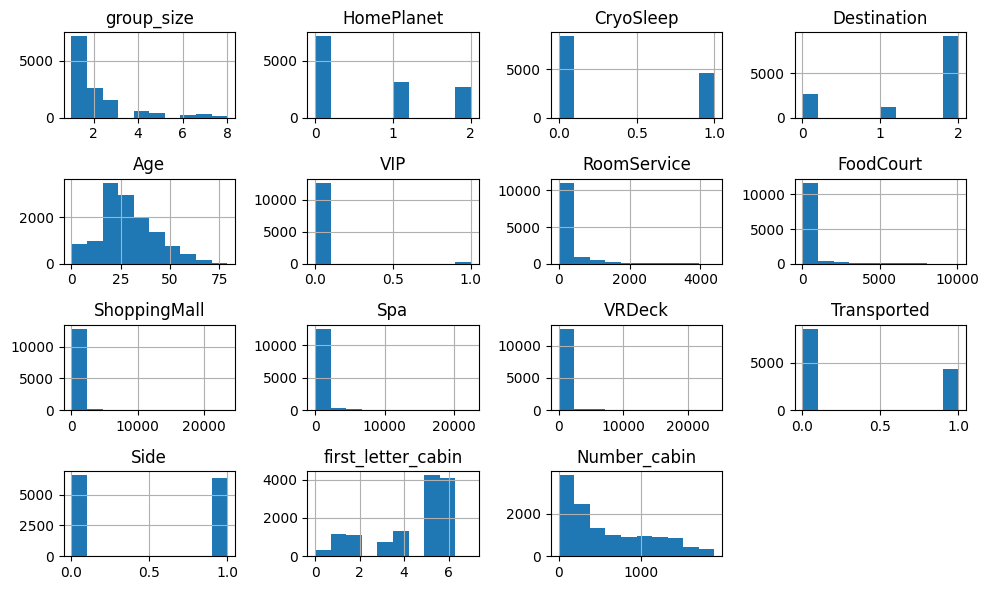

In [53]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
# df[numeric_columns].hist(bins=10, figsize=(10, 6))
df.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

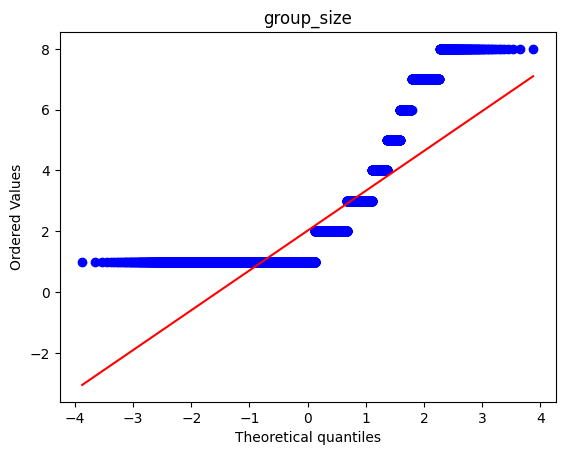

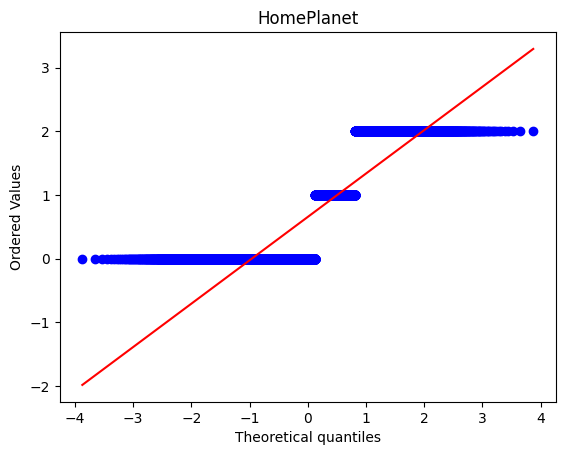

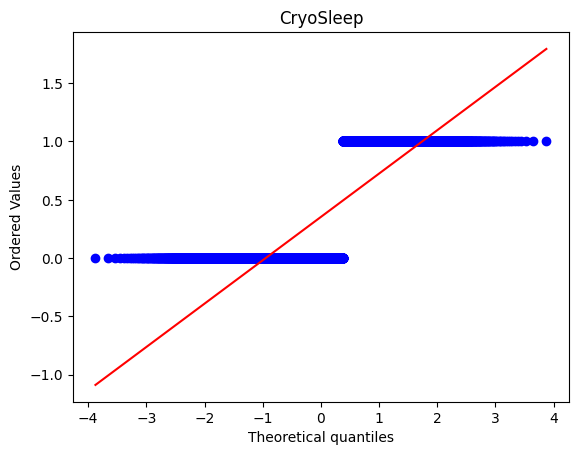

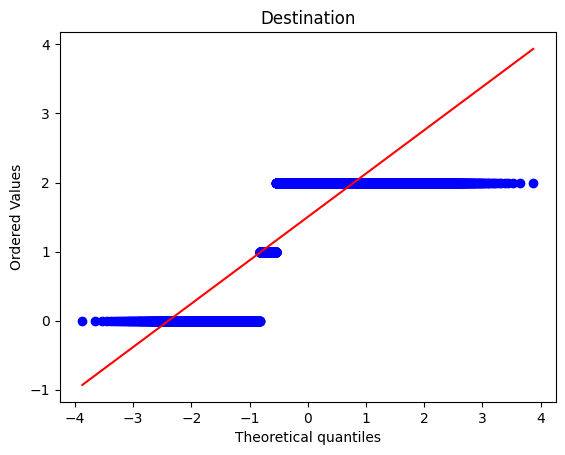

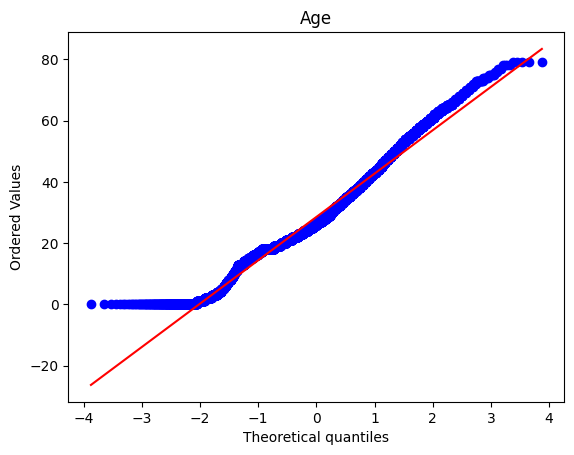

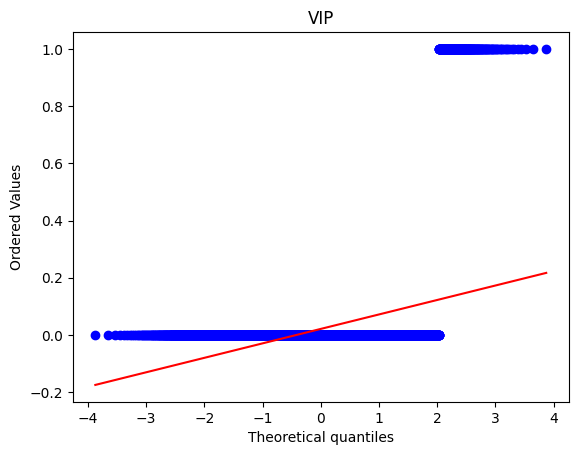

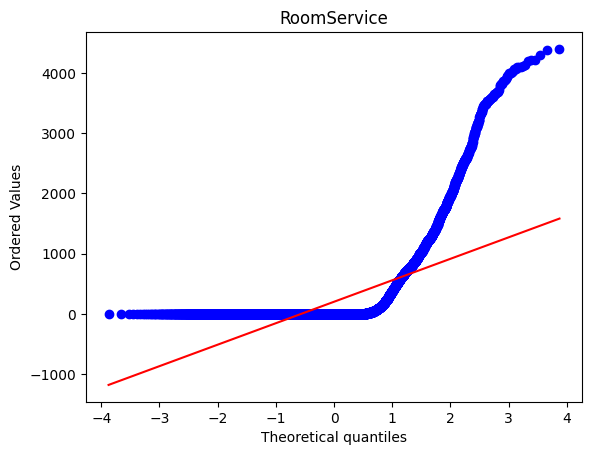

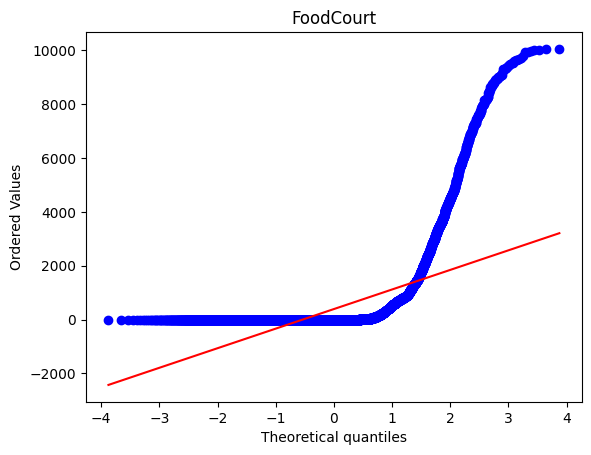

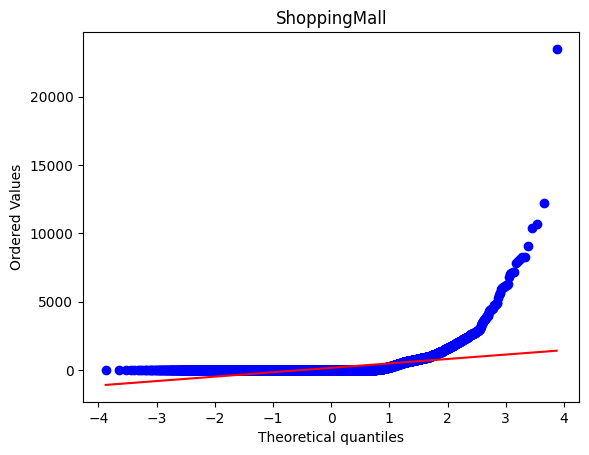

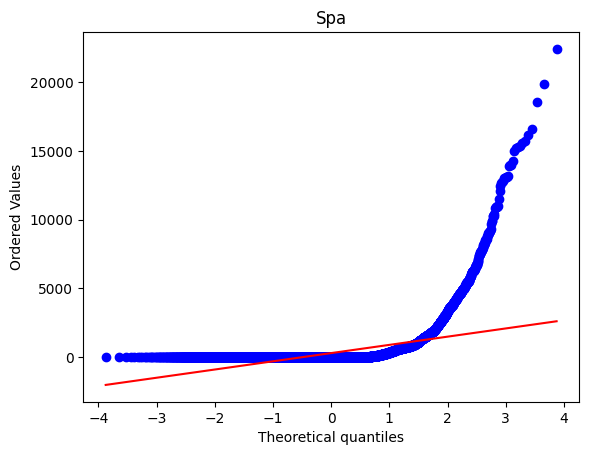

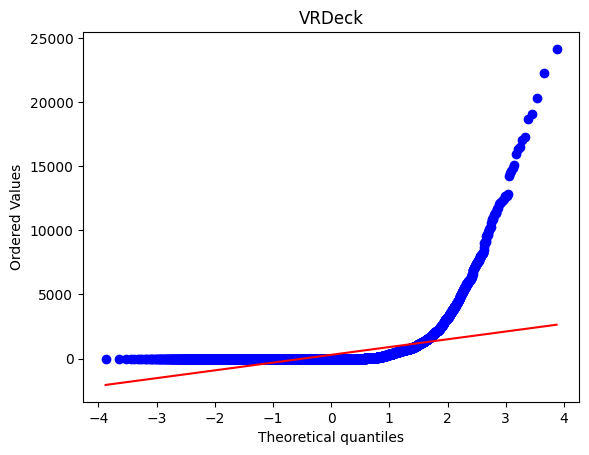

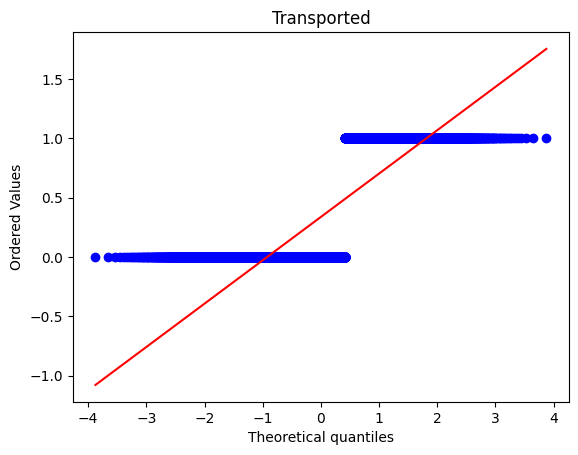

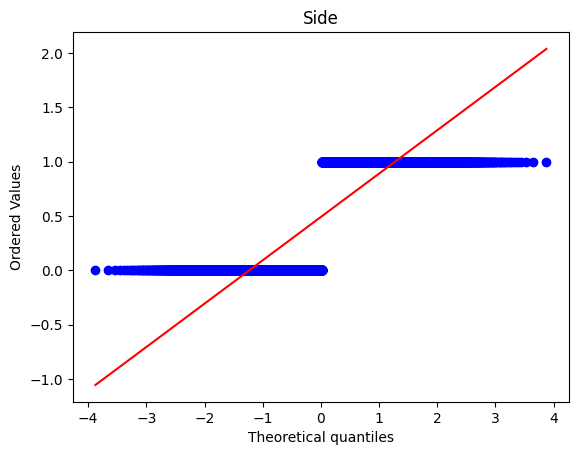

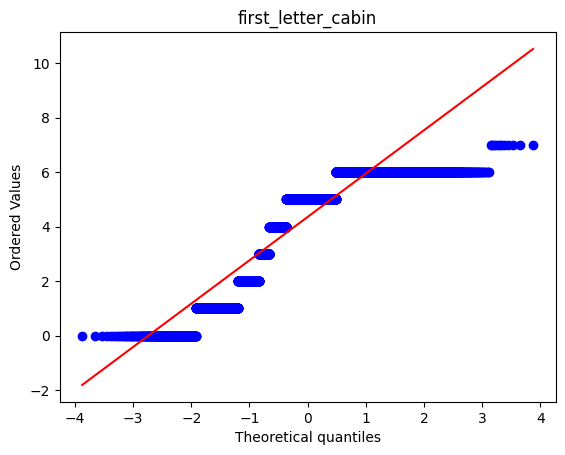

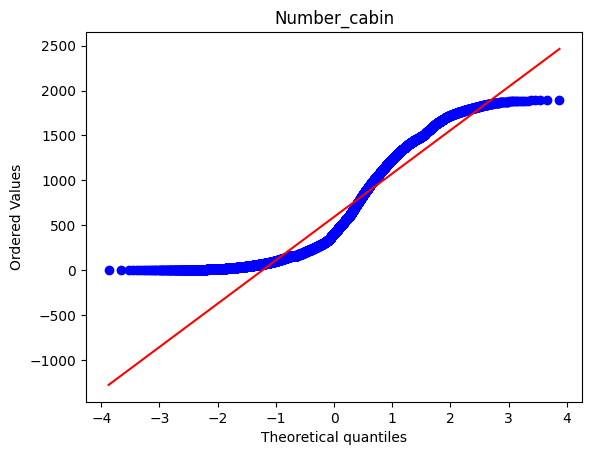

In [54]:
import scipy.stats as stats
import seaborn as sns

# Create Q-Q plots for numerical features
for column in df.columns:
    if df[column].dtype != 'object':
        stats.probplot(df[column], dist="norm", plot=sns.mpl.pyplot)
        plt.title(column)
        plt.show()

In [55]:
# from scipy.stats import shapiro

# # Perform Shapiro-Wilk test for numerical features
# for column in df_final.columns:
#     if df[column].dtype != 'object':
#         stat, p = shapiro(df[column])
#         alpha = 0.05
#         if p > alpha:
#             print(f"{column}: Gaussian (p-value: {p})")
#         else:
#             print(f"{column}: Not Gaussian (p-value: {p})")


## Step 5: Apply Transformations

Apply transformations to the data if required, based on the normality check results.

Common transformations include:

* Logarithmic transformation: Use when data is positively skewed.
* Square root transformation: Use when data has a moderate positive skew.
* Power transformation: Use when data has a severe positive or negative skew.

Apply the chosen transformation(s) to the appropriate features.

In [56]:
def transformation_numerical(column):
    
    numeric_data = df[numeric_columns]
    
    log_transformed_df = np.log1p(numeric_data)
    sqrt_transformed_df = np.sqrt(numeric_data)
    power_transformed_df = np.power(numeric_data, 2)
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 4))
    

    axes[0].hist(df[column], bins=20)
    axes[0].set_title('Original ' + column)
    axes[0].set_xlabel('Values')
    axes[0].set_ylabel('Frequency')
    
    # Plot the logarithmically transformed data
    axes[1].hist(log_transformed_df[column], bins=20)
    axes[1].set_title('Logarithmic Transformation of ' + column)
    axes[1].set_xlabel('Transformed Values')
    axes[1].set_ylabel('Frequency')
    
    # Plot the square root transformed data
    axes[2].hist(sqrt_transformed_df[column], bins=20)
    axes[2].set_title('Square Root Transformation of ' + column)
    axes[2].set_xlabel('Transformed Values')
    axes[2].set_ylabel('Frequency')
    
    # Plot the power transformed data
    axes[3].hist(power_transformed_df[column], bins=20)
    axes[3].set_title('Power Transformation of ' + column)
    axes[3].set_xlabel('Transformed Values')
    axes[3].set_ylabel('Frequency')
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Display the plots
    plt.show()

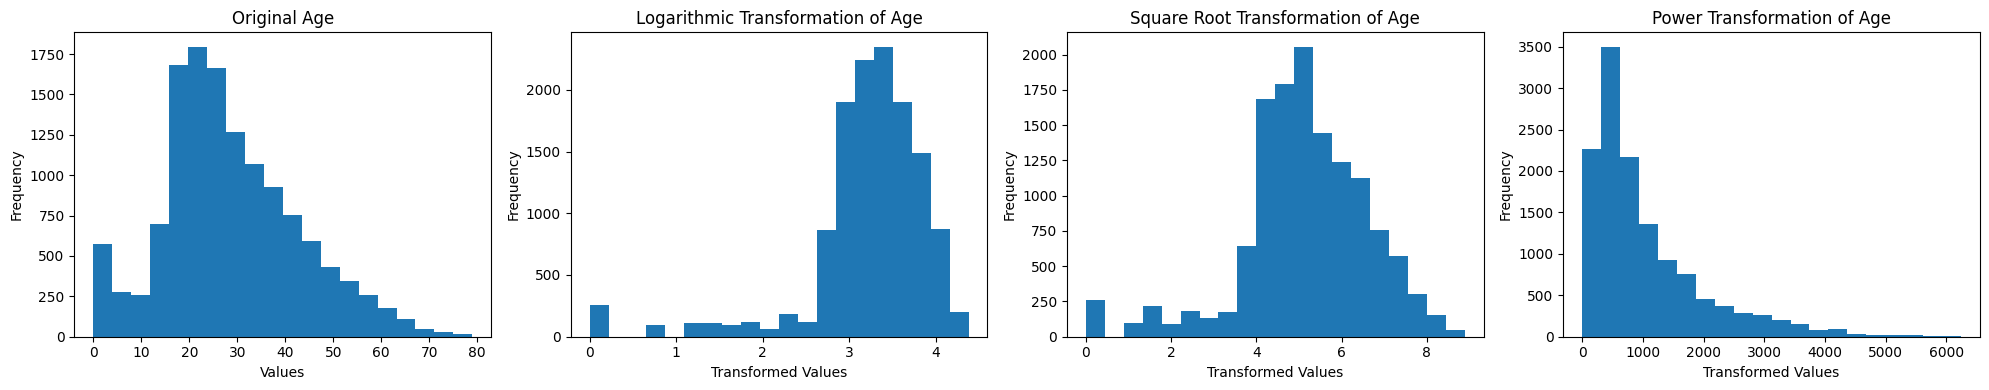

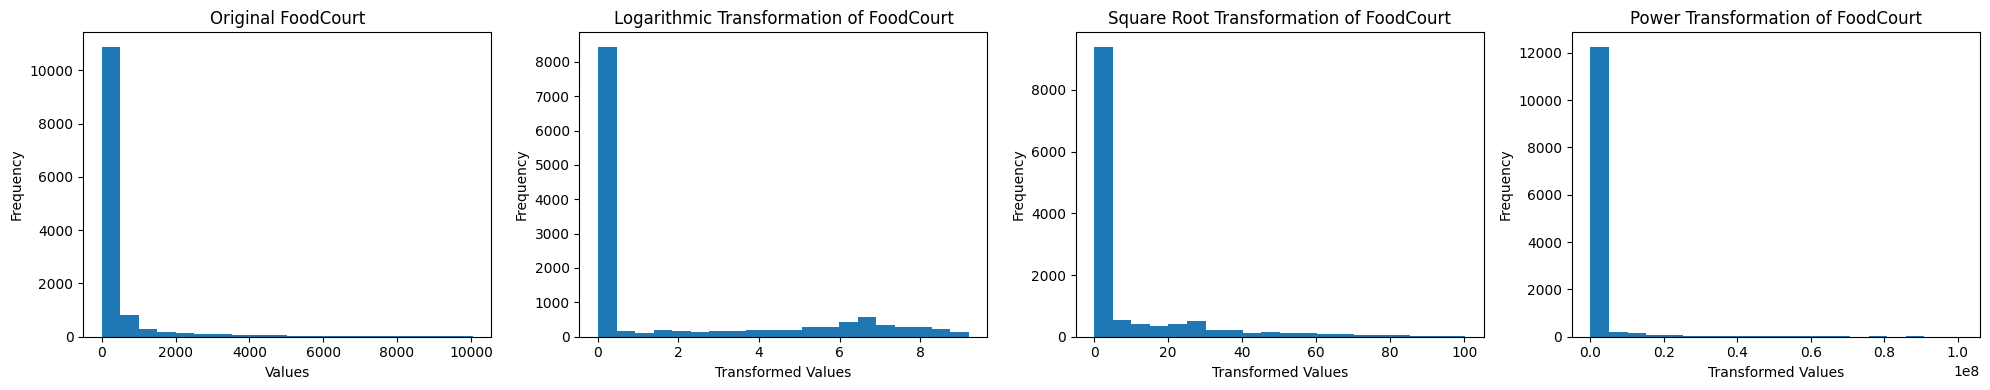

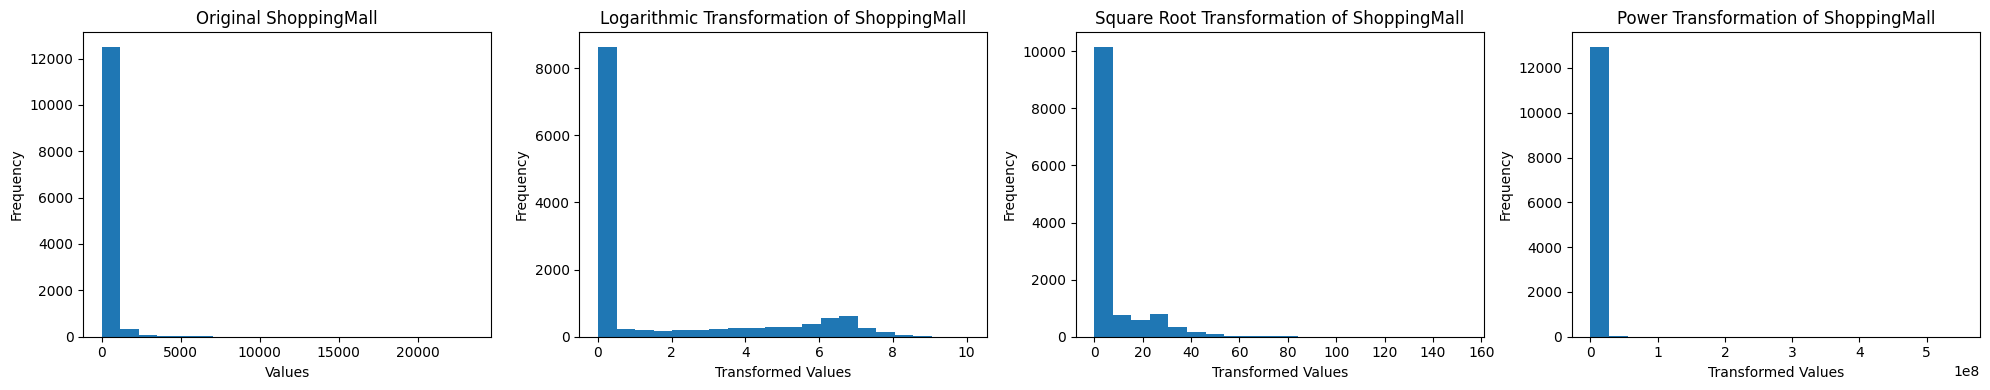

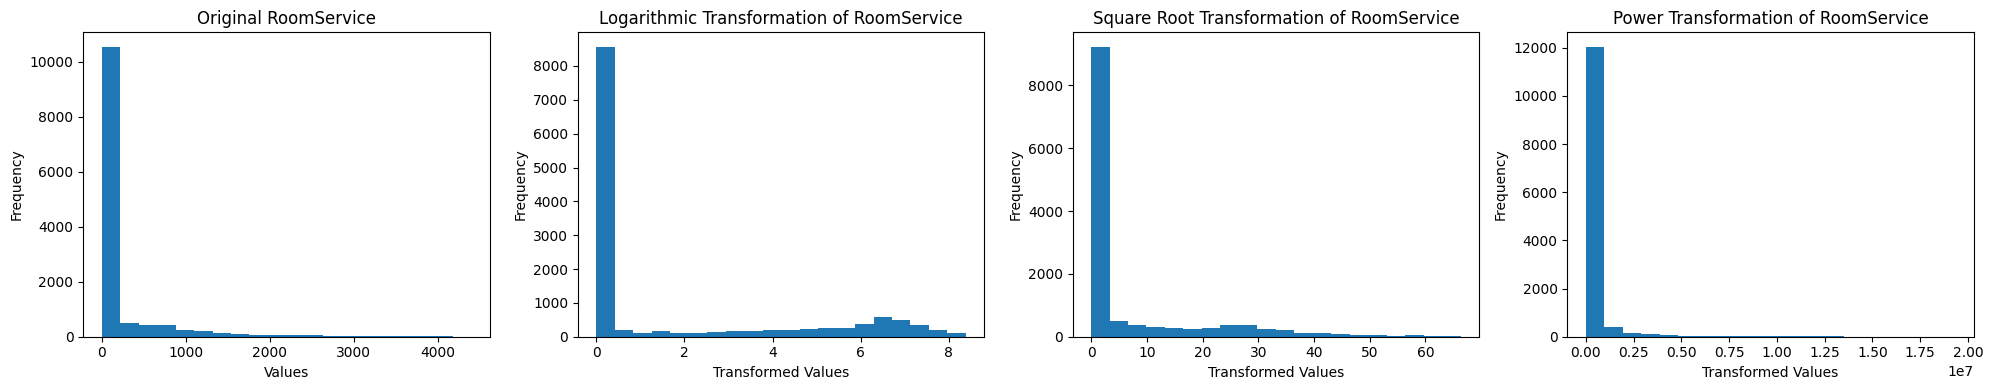

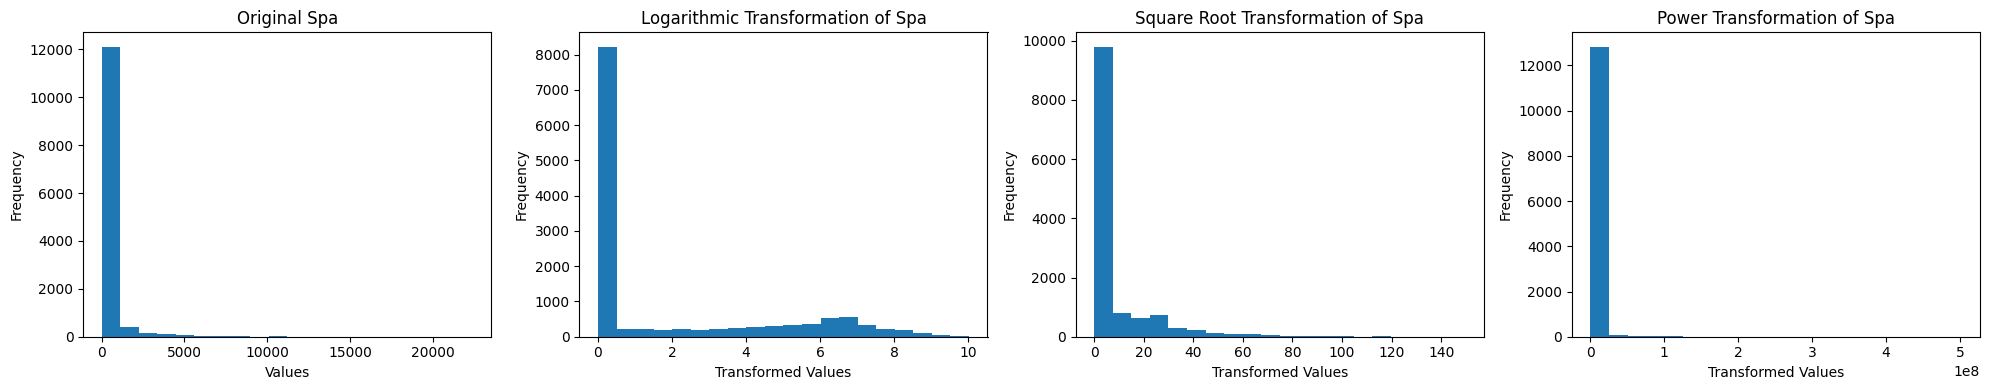

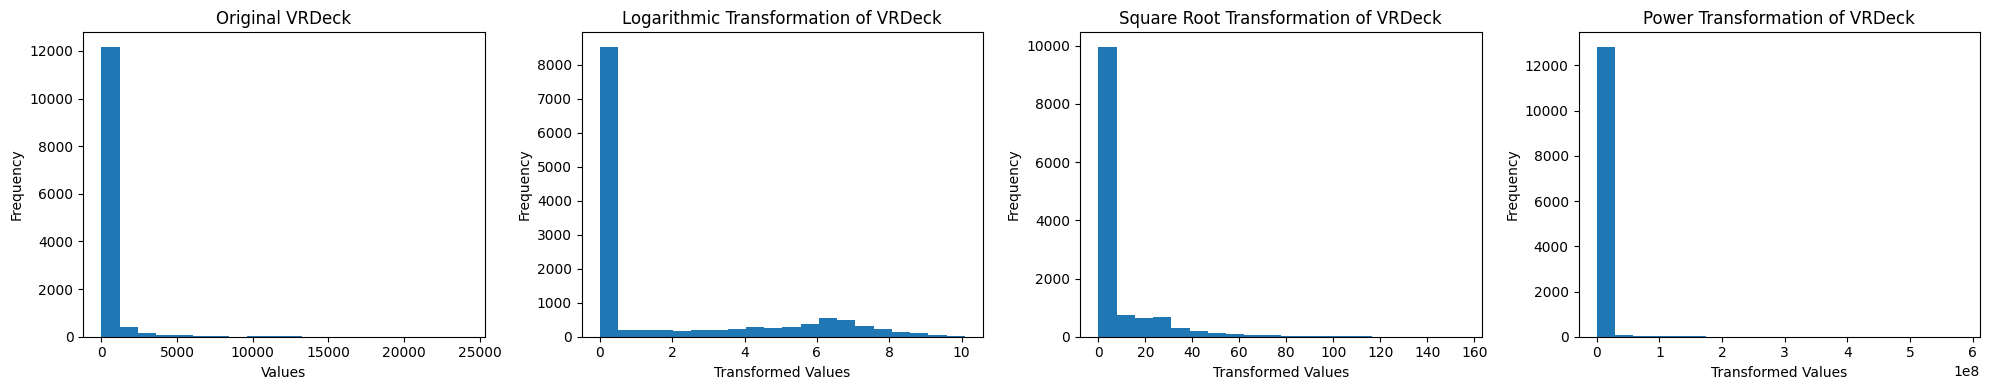

In [57]:
for i in numeric_columns:
    transformation_numerical(i)

In [58]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df[numeric_columns] = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=[numeric_columns])


In [59]:
# df[numeric_columns] = np.log(df[numeric_columns])
df[numeric_columns] = np.sqrt(df[numeric_columns])

In [60]:

data_skewness = skew(df)
print("Skewness:", data_skewness)

Skewness: [ 1.91492188  0.69893063  0.61427338 -1.15119223 -0.81101906  6.6731296
  2.06043782  2.51098743  2.68526322  3.06882657  3.23199371  0.6870835
  0.03207814 -0.99034795  0.7419299 ]


In [61]:
# df_log = df[numeric_columns].apply(np.log)
# df_transformed = pd.concat([df.drop(numeric_columns, axis=1), df_log], axis=1)

In [62]:

# df_sqrt = df.apply(np.sqrt)
# df = pd.concat([df.drop(numeric_columns, axis=1), df_sqrt], axis=1)

In [63]:
df.describe()

,group_size,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,first_letter_cabin,Number_cabin
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,2.022822,0.655436,0.353200,1.501465,5.120619,0.021049,6.624321,8.706340,5.746167,7.482886,7.225010,0.337548,0.491981,4.359985,593.375482
std,1.577153,0.799855,0.477983,0.810738,1.525504,0.143552,12.662604,17.744484,11.737618,15.676341,15.756543,0.472892,0.499955,1.757050,511.297918
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,4.358899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,160.000000
50%,1.000000,0.000000,0.000000,2.000000,5.099020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,409.000000
75%,2.000000,1.000000,1.000000,2.000000,6.082763,0.000000,6.538264,7.921442,4.795832,7.071068,6.000000,1.000000,1.000000,6.000000,992.000000
max,8.000000,2.000000,1.000000,2.000000,8.888194,1.000000,66.309879,100.244701,153.271002,149.693019,155.347996,1.000000,1.000000,7.000000,1894.000000


In [64]:
# target_corr = df.corr()['Transported'].abs().sort_values(ascending=False)
# target_corr

## Step 6: Split the Data

Split the preprocessed and transformed data into training and testing sets.
Typically, use around 70-80% of the data for training and the remaining for testing.

In [65]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X = df.drop('Transported', axis=1) 
y = df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 7: Select a Suitable Algorithm

Determine the appropriate algorithm(s) for this binary classification problem.
Consider algorithms like **Logistic Regression, Decision Trees, Random Forests, or Support Vector Machines.**
Choose an algorithm that suits the problem requirements and constraints.

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest Classifier
model = RandomForestClassifier()


## Step 8: Train the Model

Train the selected algorithm on the training dataset.
Adjust hyperparameters if necessary to optimize model performance.
Evaluate the model's performance using suitable metrics (accuracy, precision, recall, etc.).

In [67]:
model.fit(X_train, y_train)  


RandomForestClassifier()

In [68]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.7340015420200463
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1706
           1       0.64      0.51      0.57       888

    accuracy                           0.73      2594
   macro avg       0.70      0.68      0.69      2594
weighted avg       0.73      0.73      0.73      2594



# Step 9: Validate the Model

Use the testing dataset to validate the model's performance.
Calculate the same metrics as in step 8 to assess the model's accuracy and generalization ability.
Identify any issues like overfitting or underfitting.

In [69]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [70]:
from sklearn.metrics import f1_score

In [71]:
from sklearn.metrics import f1_score

y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


f1 = f1_score(y_test, y_pred)
print("f1_score:", f1)

Accuracy: 0.7340015420200463
f1_score: 0.55078125


In [72]:
predictions = best_model.predict(df.drop('Transported', axis=1))

## Step 10: Fine-tune and Optimize the Model

If needed, fine-tune the model by adjusting hyperparameters or trying different algorithms.
Employ techniques like cross-validation or grid search to find the best hyperparameters.
Iterate this process until you achieve satisfactory performance.

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Define the list of algorithms to try
algorithms = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier())
]

# Iterate over each algorithm and fine-tune hyperparameters
for algorithm_name, algorithm in algorithms:
    # Define the parameter grid for grid search
    param_grid = {}
    if algorithm_name == 'Logistic Regression':
        param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2']}
    elif algorithm_name == 'Random Forest':
        param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
    
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(algorithm, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Evaluate the model's performance using cross-validation
    scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    
  


## Step 11: Evaluate the Final Model

Evaluate the final model on the testing dataset once again.
Calculate relevant metrics to assess the model's accuracy, precision, recall, etc.
Interpret the model's predictions and document the results.


In [74]:

print(f"Algorithm: {algorithm_name}")
print(f"Best Hyperparameters: {best_params}")
print(f"Cross-Validation Accuracy: {mean_accuracy}")


y_pred = best_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {test_accuracy}")
f1 = f1_score(y_test, y_pred)
print("f1_score:", f1)


Algorithm: Random Forest
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 100}
Cross-Validation Accuracy: 0.737566265060241
f1_score: 0.5455720749838396


## Step 12: Communicate the Findings

Prepare a report or presentation summarizing the project's objectives, methodology, and results.
Clearly communicate the insights gained from the model, such as the importance of different features in predicting survival.
Provide recommendations or potential applications based on the findings.

CryoSleep             0.319534
RoomService           0.235214
Spa                   0.226262
VRDeck                0.206659

Those have greater affect on survival of passengers as well as others. 
We can clearly see there is something wrong with the Luxuery items such as
VRDeck spa and Roomservice. Also there may be somthing wrong in Cabin where
most of the passengers are confined to.

## Step 13: Reflect and Learn

Reflect on the entire process and discuss the strengths and limitations of the project.
Identify areas for improvement and suggest future work or possible enhancements.
Share any lessons learned from the project to inform future endeavors.
Remember, adapt this guide based on the specific requirements and learning goals of your charity data bootcamp organization.

It feels great to guess an unknown passenger whether he or she died or not during the cruise. 
Its even greater if we speak for the next cruise ships. And avoid the casulties.